<a href="https://colab.research.google.com/github/NguyenLeHuyBao/AirBnB-Data-Analysis/blob/main/BaoNguyen_DS_Group_11_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import gdown
id = '1BmHcXYeEoFmhDlZJzSjAU1KuHkLyjdS9'
url = 'http://drive.google.com/u/1/uc?id={}&export=download'.format(id)
gdown.download(url, './AirBnB-Dataset.zip', quiet=False)

Downloading...
From: http://drive.google.com/u/1/uc?id=1BmHcXYeEoFmhDlZJzSjAU1KuHkLyjdS9&export=download
To: /content/AirBnB-Dataset.zip
100%|██████████| 10.8M/10.8M [00:00<00:00, 187MB/s]


'./AirBnB-Dataset.zip'

In [3]:
!unzip /content/AirBnB-Dataset.zip

Archive:  /content/AirBnB-Dataset.zip
replace neighbourhoods.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: neighbourhoods.csv      
  inflating: reviews.csv             
  inflating: calendar.csv            
  inflating: listings.csv            


# Import libraries and data

In [4]:
import pandas as pd

reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')

In [5]:
import seaborn as sns 

# Data Cleaning

In [6]:
#Convert from scientific style (e+04) to 2 decimal float format 
pd.options.display.float_format = "{:.2f}".format

## Cleaning listing dataset

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50646,https://www.airbnb.com/rooms/50646,20211226165704,2021-12-27,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.19
1,71609,https://www.airbnb.com/rooms/71609,20211226165704,2021-12-27,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,f,5,0,5,0,0.16
2,71896,https://www.airbnb.com/rooms/71896,20211226165704,2021-12-27,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,f,5,0,5,0,0.19
3,71903,https://www.airbnb.com/rooms/71903,20211226165704,2021-12-27,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,https://www.airbnb.com/users/show/367042,...,4.64,4.50,4.36,NaN,f,5,0,5,0,0.36
4,275343,https://www.airbnb.com/rooms/275343,20211226165704,2021-12-27,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/11979330/9bbd...,1439258,https://www.airbnb.com/users/show/1439258,...,4.47,4.53,4.59,S0399,f,16,1,15,0,0.19


In [8]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3672 non-null   int64  
 1   listing_url                                   3672 non-null   object 
 2   scrape_id                                     3672 non-null   int64  
 3   last_scraped                                  3672 non-null   object 
 4   name                                          3672 non-null   object 
 5   description                                   3555 non-null   object 
 6   neighborhood_overview                         2373 non-null   object 
 7   picture_url                                   3672 non-null   object 
 8   host_id                                       3672 non-null   int64  
 9   host_url                                      3672 non-null   o

In [10]:
listings.shape

(3672, 74)

In [11]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3672.00,3672.00,3672.00,3661.00,3661.00,3672.00,3672.00,3672.00,0.00,3255.00,...,1989.00,1988.00,1989.00,1988.00,1988.00,3672.00,3672.00,3672.00,3672.00,2044.00
mean,31461094.43,20211226165703.77,122471169.82,67.45,67.45,1.31,103.85,2.90,NaN,1.33,...,4.52,4.74,4.73,4.67,4.49,43.54,33.38,9.20,0.41,0.51
std,14771715.26,0.23,109865741.71,118.00,118.00,0.03,0.04,2.25,NaN,0.68,...,0.64,0.54,0.56,0.51,0.61,61.43,60.94,17.97,1.50,0.84
min,50646.00,20211226165704.00,23666.00,0.00,0.00,1.25,103.65,0.00,NaN,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.01
25%,19833778.75,20211226165704.00,28757013.25,2.00,2.00,1.29,103.84,2.00,NaN,1.00,...,4.33,4.72,4.72,4.54,4.33,2.00,0.00,0.00,0.00,0.07
50%,33621975.00,20211226165704.00,97878860.00,12.00,12.00,1.31,103.85,2.00,NaN,1.00,...,4.72,4.93,4.93,4.83,4.66,10.00,1.00,2.00,0.00,0.19
75%,43256475.50,20211226165704.00,177899808.50,68.00,68.00,1.32,103.86,4.00,NaN,1.00,...,5.00,5.00,5.00,5.00,4.95,59.00,19.00,7.00,0.00,0.62
max,53927825.00,20211226165704.00,435814987.00,467.00,467.00,1.45,103.97,16.00,NaN,8.00,...,5.00,5.00,5.00,5.00,5.00,199.00,186.00,86.00,13.00,13.27


**Remove unnecesary columns in dataset**

 
 0   id             **No**     
 1   listing_url    **DROP**                                
 2   scrape_id      **DROP**                                 
 3   last_scraped   **DROP**                                
 4   name           **DROP**                                
 5   description    **DROP**                                
 6   neighborhood_overview  **DROP**                           
 7   picture_url **DROP**                                    
 8   host_id     **NO**                                    
 9   host_url    **DROP**                                   
 10  host_name   **DROP**                                   
 11  host_since  **NO**                                   
 12  host_location **DROP**                                 
 13  host_about **DROP**                                    
 14  host_response_time **NO**                            
 15  host_response_rate **NO**                            
 16  host_acceptance_rate  **DROP**                         
 17  host_is_superhost **NO**                             
 18  host_thumbnail_url   **DROP**                          
 19  host_picture_url    **DROP**                           
 20  host_neighbourhood  **DROP**                           
 21  host_listings_count  **DROP: use calculated_host_listings_count**                           
 22  host_total_listings_count **NO**                     
 23  host_verifications **DROP:host_identity_verified is clearer to use**                             
 24  host_has_profile_pic **DROP**                          
 25  host_identity_verified **NO**                        
 26  neighbourhood **DROP**                                  
 27  neighbourhood_cleansed **NO**                         
 28  neighbourhood_group_cleansed **NO**                   
 29  latitude **NO**                                      
 30  longitude **NO**                                    
 31  property_type **NO**                                  
 32  room_type  **NO**                                     
 33  accommodates **NO**                                    
 34  bathrooms   **DROP: no data**                               
 35  bathrooms_text **NO**                                 
 36  bedrooms **NO**                                     
 37  beds  **NO**                                        
 38  amenities   **NO**                                   
 39  price    **NO**                                      
 40  minimum_nights  **NO**                                
 41  maximum_nights  **DROP**                                
 42  minimum_minimum_nights **DROP**                       
 43  maximum_minimum_nights **DROP**                       
 44  minimum_maximum_nights **DROP**                       
 45  maximum_maximum_nights **DROP**                       
 46  minimum_nights_avg_ntm  **DROP**                      
 47  maximum_nights_avg_ntm **DROP**                       
 48  calendar_updated  **DROP**                         
 49  has_availability  **DROP**                              
 50  availability_30    **DROP**                              
 51  availability_60   **DROP**                               
 52  availability_90  **DROP**                                
 53  availability_365  **DROP**                               
 54  calendar_last_scraped **DROP**                          
 55  number_of_reviews **NO**                               
 56  number_of_reviews_ltm **DROP**                          
 57  number_of_reviews_l30d **DROP**                         
 58  first_review **DROP**                                   
 59  last_review  **DROP**                                  
 60  review_scores_rating **NO**                          
 61  review_scores_accuracy **NO**                       
 62  review_scores_cleanliness **NO**                    
 63  review_scores_checkin  **NO**                       
 64  review_scores_communication **NO**                  
 65  review_scores_location **NO**                       
 66  review_scores_value **NO**                          
 67  license **DROP: mostly null**                                      
 68  instant_bookable **No**                              
 69  calculated_host_listings_count **DROP**                 
 70  calculated_host_listings_count_entire_homes **DROP**     
 71  calculated_host_listings_count_private_rooms **DROP**   
 72  calculated_host_listings_count_shared_rooms **DROP**    
 73  reviews_per_month   **NO**                          

In [12]:
columns = [
  "listing_url", "scrape_id", "last_scraped", "name", "picture_url", "host_url", "host_name", "host_location", "host_about"
  , "host_acceptance_rate", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_listings_count", "host_verifications", "host_has_profile_pic",
  "neighbourhood", "bathrooms", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
  "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365",
  "calendar_last_scraped", "number_of_reviews_ltm", "number_of_reviews_l30d", "first_review", "last_review", "license", "calculated_host_listings_count",
  "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms"
   ,"description", "neighborhood_overview"
]

In [13]:
#create a new copy of the dataset
listing_clean = listings.drop(columns = columns)

In [14]:
listing_clean.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dtype='object')

In [15]:
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3672 non-null   int64  
 1   host_id                       3672 non-null   int64  
 2   host_since                    3661 non-null   object 
 3   host_response_time            3218 non-null   object 
 4   host_response_rate            3218 non-null   object 
 5   host_is_superhost             3661 non-null   object 
 6   host_total_listings_count     3661 non-null   float64
 7   host_identity_verified        3661 non-null   object 
 8   neighbourhood_cleansed        3672 non-null   object 
 9   neighbourhood_group_cleansed  3672 non-null   object 
 10  latitude                      3672 non-null   float64
 11  longitude                     3672 non-null   float64
 12  property_type                 3672 non-null   object 
 13  roo

In [16]:
#Check duplicate
listing_clean.duplicated().sum()


0

**Convert datatype to datetime for host_since column**

In [17]:
listing_clean['host_since'] = pd.to_datetime(listing_clean['host_since'])

**Extract month, day and year from host_since column**

In [18]:
listing_clean['host_since_day'] = listing_clean['host_since'].dt.day
listing_clean['host_since_month'] = listing_clean['host_since'].dt.month
listing_clean['host_since_year'] = listing_clean['host_since'].dt.year

In [19]:
listing_clean.head(1)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_day,host_since_month,host_since_year
0,50646,227796,2010-09-08,NaN,NaN,f,1.00,t,Bukit Timah,Central Region,...,4.78,4.78,4.94,4.72,4.50,f,0.19,8.00,9.00,2010.00


**Remove % in host_response_rate column**

In [20]:
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')

**Remove $ for price column**

In [21]:
listing_clean['price'] = listing_clean['price'].str.replace(r'[$,]', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**HANDLING NULL VALUES**

In [22]:
listing_clean.isna().sum()

id                                 0
host_id                            0
host_since                        11
host_response_time               454
host_response_rate               454
host_is_superhost                 11
host_total_listings_count         11
host_identity_verified            11
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    29
bedrooms                         417
beds                             130
amenities                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
review_scores_rating            1628
review_scores_accuracy          1684
review_scores_cleanliness       1683
review_scores_checkin           1684
review_scores_communication     1683
r

**Fill null values with 0 for review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication,
review_scores_location, review_scores_value,reviews_per_month**

In [23]:
listing_clean['review_scores_rating'] = listing_clean[['review_scores_rating']].fillna(0)
listing_clean['review_scores_accuracy'] = listing_clean[['review_scores_accuracy']].fillna(0)
listing_clean['review_scores_cleanliness'] = listing_clean[['review_scores_cleanliness']].fillna(0)
listing_clean['review_scores_checkin'] = listing_clean[['review_scores_checkin']].fillna(0)
listing_clean['review_scores_communication'] = listing_clean[['review_scores_communication']].fillna(0)
listing_clean['review_scores_location'] = listing_clean[['review_scores_location']].fillna(0)
listing_clean['review_scores_value'] = listing_clean[['review_scores_value']].fillna(0)
listing_clean['reviews_per_month'] = listing_clean[['reviews_per_month']].fillna(0)
listing_clean['bathrooms_text'] = listing_clean[['bathrooms_text']].fillna("0 baths")

In [24]:
#Calculate percentage of null values in each column
listing_clean.isna().sum() * 100 / len(listing_clean)

id                              0.00
host_id                         0.00
host_since                      0.30
host_response_time             12.36
host_response_rate             12.36
host_is_superhost               0.30
host_total_listings_count       0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
neighbourhood_group_cleansed    0.00
latitude                        0.00
longitude                       0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms_text                  0.00
bedrooms                       11.36
beds                            3.54
amenities                       0.00
price                           0.00
minimum_nights                  0.00
number_of_reviews               0.00
review_scores_rating            0.00
review_scores_accuracy          0.00
review_scores_cleanliness       0.00
review_scores_checkin           0.00
review_scores_communication     0.00
r

**Drop null values under 1 percentage except host_is_superhost** 

In [25]:
listing_clean = listing_clean[listing_clean['host_since'].notna()]
listing_clean = listing_clean[listing_clean['bathrooms_text'].notna()]
listing_clean = listing_clean[listing_clean['host_total_listings_count'].notna()]
listing_clean = listing_clean[listing_clean['host_identity_verified'].notna()]
listing_clean = listing_clean[listing_clean['host_is_superhost'].notna()]

**Fill null values for host_response_rate column with its correspond mean based on host_is_superhost**

In [26]:
superhost_t_mean = listing_clean[(listing_clean['host_is_superhost'] == "t") & (listing_clean['host_response_rate'].notna())]['host_response_rate'].mean()
superhost_f_mean = listing_clean[(listing_clean['host_is_superhost'] == "f") & (listing_clean['host_response_rate'].notna())]['host_response_rate'].mean()

In [27]:
listing_clean.loc[(listing_clean['host_is_superhost'] == "t") , 'host_response_rate'] = listing_clean.loc[(listing_clean['host_is_superhost'] == "t") , 'host_response_rate'].fillna(superhost_t_mean)

In [28]:
listing_clean.loc[(listing_clean['host_is_superhost'] == "f") , 'host_response_rate'] = listing_clean.loc[(listing_clean['host_is_superhost'] == "f") , 'host_response_rate'].fillna(superhost_f_mean)

**Fill null values for host_response_time with not provided**

In [29]:
listing_clean['host_response_time'] = listing_clean['host_response_time'].fillna('not provided') 

**Fill null values for bedroom columns with 1**

In [30]:
listing_clean['bedrooms'] = listing_clean['bedrooms'].fillna(1)

**Fill null values in bed column with 1**

In [31]:
listing_clean['beds'] = listing_clean['beds'].fillna(1)

## Cleaning calendar dataset

In [32]:
calendar.shape[0]

1339917

In [33]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [34]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339917 entries, 0 to 1339916
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1339917 non-null  int64  
 1   date            1339917 non-null  object 
 2   available       1339917 non-null  object 
 3   price           1339917 non-null  object 
 4   adjusted_price  1339917 non-null  object 
 5   minimum_nights  1339913 non-null  float64
 6   maximum_nights  1339913 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 71.6+ MB


In [35]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,1339917.00,1339913.00,1339913.00
mean,31456671.21,40.54,4623175.76
std,14769264.99,67.10,99522498.45
min,50646.00,1.00,1.00
25%,19832956.00,2.00,1000.00
50%,33621601.00,7.00,1125.00
75%,43254119.00,90.00,1125.00
max,53927825.00,1000.00,2147483647.00


In [36]:
calendar.sample(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
957448,42946035,2022-06-14,t,$425.00,$425.00,6.00,1125.00
796895,39405623,2022-09-29,t,$700.00,$700.00,90.00,1125.00
561181,30520904,2022-12-22,t,$59.00,$59.00,18.00,1125.00


**Drop unnecessary columns**

In [37]:
#create a copy of dataset
calendar_clean = calendar.drop(columns=['maximum_nights', 'price'])

**Rename column adjusted_price to price**

In [38]:
calendar_clean.rename(columns = {'adjusted_price': 'price'}, inplace=True)

In [39]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339917 entries, 0 to 1339916
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1339917 non-null  int64  
 1   date            1339917 non-null  object 
 2   available       1339917 non-null  object 
 3   price           1339917 non-null  object 
 4   minimum_nights  1339913 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 51.1+ MB


**Convert date column data type to datetime**

In [40]:
calendar_clean['date'] = pd.to_datetime(calendar_clean['date'])

**Extract month, day and year from date column**

In [41]:
calendar_clean['calendar_day'] = calendar_clean['date'].dt.day
calendar_clean['calendar_month'] = calendar_clean['date'].dt.month
calendar_clean['calendar_year'] = calendar_clean['date'].dt.year

**Remove $ sign and change data type of column price to float**

In [42]:
calendar_clean['price'] = calendar_clean['price'].str.replace(r'[$,]', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [43]:
calendar_clean.isna().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    4
calendar_day      0
calendar_month    0
calendar_year     0
dtype: int64

**Remove null values in minimum_nights column**

In [44]:
calendar_clean = calendar_clean[calendar_clean['minimum_nights'].notna()]

**Double check for null values**

In [45]:
calendar_clean.isna().sum()

listing_id        0
date              0
available         0
price             0
minimum_nights    0
calendar_day      0
calendar_month    0
calendar_year     0
dtype: int64

## Cleaning neighbourhoods dataset

**This dataset does not need to be clean**

## Cleaning reviews dataset

In [46]:
reviews.shape[0]

43239

In [47]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43239 entries, 0 to 43238
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     43239 non-null  int64 
 1   id             43239 non-null  int64 
 2   date           43239 non-null  object
 3   reviewer_id    43239 non-null  int64 
 4   reviewer_name  43239 non-null  object
 5   comments       43143 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.0+ MB


In [48]:
reviews.describe()

,listing_id,id,reviewer_id
count,43239.00,43239.00,43239.00
mean,18031822.59,20264453066052608.00,112878278.37
std,12425446.06,94657351462196960.00,100636378.11
min,50646.00,251467.00,2778.00
25%,7472739.00,195014440.00,31654821.50
50%,15902723.00,406311435.00,80842482.00
75%,25892078.00,571301194.50,169816131.00
max,53717759.00,525685337249213120.00,436608302.00


**Check for null values in every columns**

In [49]:
reviews.isna().sum() / len(reviews)

listing_id      0.00
id              0.00
date            0.00
reviewer_id     0.00
reviewer_name   0.00
comments        0.00
dtype: float64

**Create a copy of review dataset**

In [50]:

review_clean = reviews.drop(columns = ['reviewer_name'])

**Convert date column datatype to datetime**

In [51]:
review_clean['date'] = pd.to_datetime(review_clean['date'])

**Extract month, day and year from date column**

In [52]:
review_clean['review_day'] = review_clean['date'].dt.day
review_clean['review_month'] = review_clean['date'].dt.month
review_clean['review_year'] = review_clean['date'].dt.year

**Drop null values for comments column**

In [53]:
review_clean = review_clean[review_clean['comments'].notna()]

**Double check for null values again**

In [54]:
review_clean.isna().sum()

listing_id      0
id              0
date            0
reviewer_id     0
comments        0
review_day      0
review_month    0
review_year     0
dtype: int64

**Check if comments contain HTML tags**

In [55]:
review_clean[review_clean['comments'].str.contains('<br/>')].head(2)

,listing_id,id,date,reviewer_id,comments,review_day,review_month,review_year
1,50646,13823948,2014-06-05,15222393,Stayed over at Sujatha's house for 3 good nigh...,5,6,2014
6,50646,16123989,2014-07-22,17188672,"Suja and her husband are really nice, amazing,...",22,7,2014


**Change default setting to read comments in full**

In [56]:
pd.set_option('display.max_colwidth', None)

**Import necessary libraries for working with string**

In [57]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [58]:
stops = stopwords.words("english") + ['would','really','also','u ','well']
lemmatizer = WordNetLemmatizer()

**Clean comments in review dataset**

In [59]:
def clean_comments(text):
    #Remove html tags
    raw = BeautifulSoup(text, "html.parser")
    raw = raw.get_text()
    #Replace non-alphabetics characters 
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()
    #Lemmatize words
    clean = [lemmatizer.lemmatize(word) for word in clean.split() if word not in stops]
    return ' '.join(clean)
review_clean['comments'] = review_clean['comments'].apply(clean_comments)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [60]:
result_dict = {}

def count_word(sentence):
    for word in sentence.split():
        if word not in result_dict:
            result_dict[word] = 1
        else:
            result_dict[word] += 1
            
review_clean['comments'].apply(count_word)

0        None
1        None
2        None
3        None
4        None
         ... 
43234    None
43235    None
43236    None
43237    None
43238    None
Name: comments, Length: 43143, dtype: object

In [61]:
pd.Series(result_dict).sort_values(ascending=False).head(40)

place          22067
stay           16157
great          15577
clean          12068
room           11309
location       11255
good           10504
host            9803
nice            9687
apartment       7727
mrt             7673
singapore       7191
u               5562
recommend       4917
station         4638
time            4522
comfortable     4513
close           4506
easy            4206
helpful         4149
walk            4034
food            4024
check           4002
friendly        3854
everything      3822
bus             3689
definitely      3625
convenient      3416
house           3356
area            3300
day             3237
like            3119
get             3074
near            3065
need            2992
around          2902
one             2840
highly          2754
minute          2713
night           2707
dtype: int64

**Create a new column called polarity to check if the comment is negative/postive**

In [62]:
from textblob import TextBlob
review_clean['polarity'] = review_clean['comments'].apply(lambda x: TextBlob(x).polarity)

#Analysis

**Despite that there are listings without reviews, we will assume that they are average class listings (Listings that neither too bad or too good). On the other hands, those that received either too few or too much are considered to be very bad or very good in order to drive customers wrote down their reviews**

**Assume that reviews with polarity's value < 0 are bad reviews and > 0 are good reviews**


In [63]:
bad_review = review_clean[review_clean['polarity'] < 0]

In [64]:
good_review = review_clean[review_clean['polarity'] >= 0]

**Identify key words in bad reviews and good reviews**

**Bad reviews**

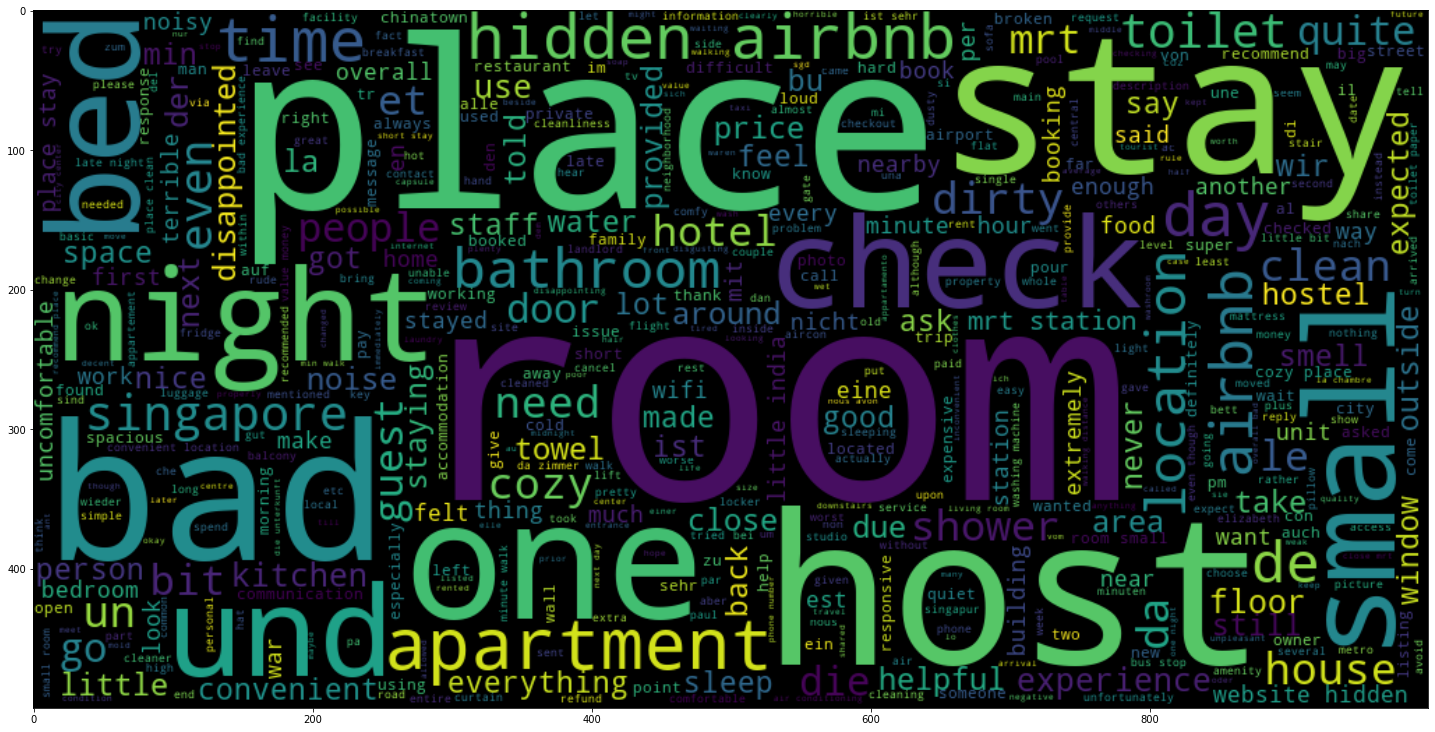

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(25,20))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(bad_review['comments'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

**Keys: dirty, small, place, bed, disapointed, amenities**

**Good review**

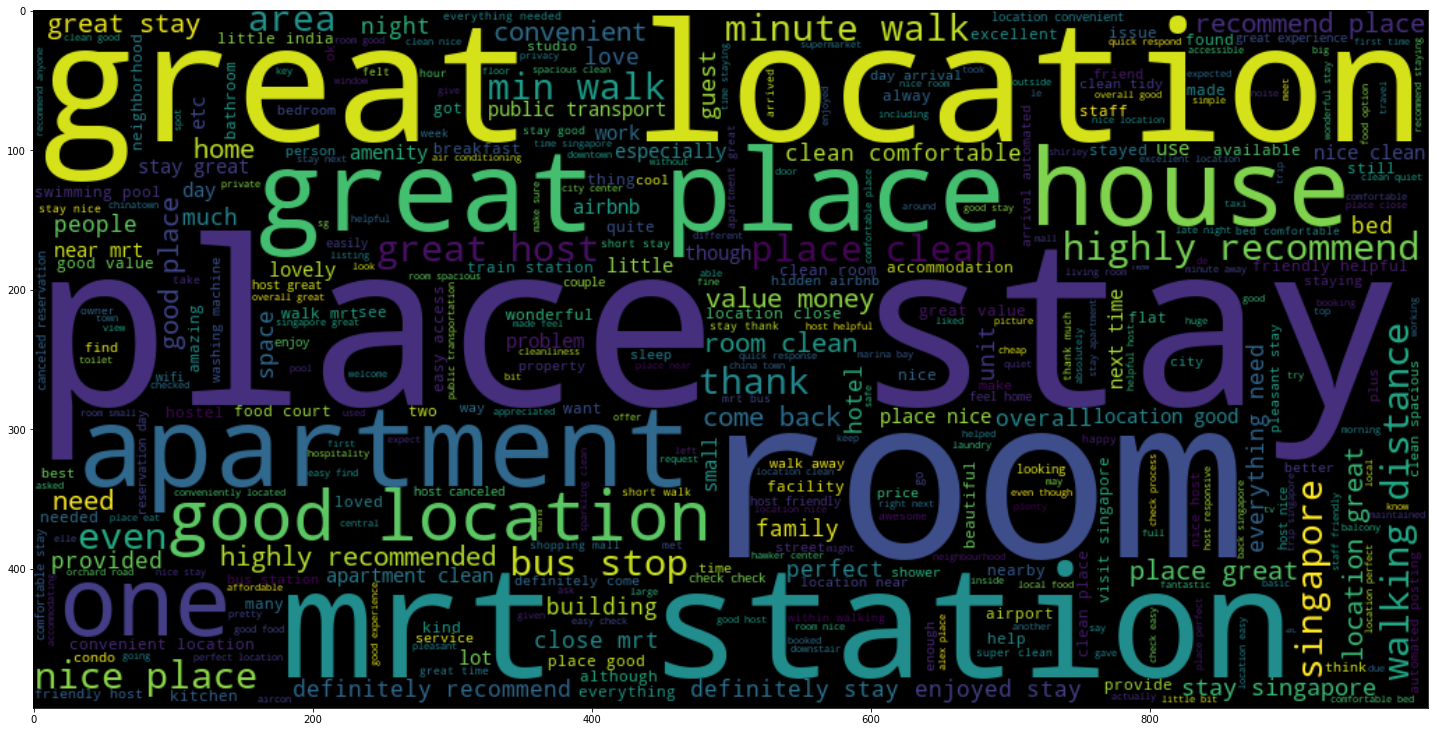

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(25,20))
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)

# The syntax requires parameter as a body of text. 
text = ' '.join(good_review['comments'].values)
words = WC.generate(text)

plt.imshow(words,interpolation='bilinear')
plt.show()

**Keys: location, room, host, nice place**


**After identify key factors which might result in the polarity of reviews. We will dive further down into these factors to see if they actually make an impact**

**Neibourhood_cleansed, neibourhood_group_cleansed, amenities, host_response_time, room_type**

In [67]:
listing_with_good_reviews = listing_clean.loc[listing_clean.id.isin(good_review.listing_id)]

In [68]:
listing_with_bad_reviews = listing_clean.loc[listing_clean.id.isin(bad_review.listing_id)]

**Price**: not much difference: 
  +mean of good: 165.62, 25%: 62.25, 50%: 110, 75%: 180
  +mean of bad: 137.73, 25%: 64, 50%: 106, 75%: 165
**Minimum_nights**: huge difference:
  number of minimum nights of good (top 5): 470, 346, 117, 140, 129
  number of minimum nights of bad (top 5): 169, 74, 45, 43, 30
**Host_response_time** (WEIRD):
  Good value counts: top1: within a few hours, top2: within an hour
  Bad value counts: top1: within an hour, top2: within a few hours
**Property_type**:
  Good: top1:  Private room in rental unit, top2: Entire rental unit, top3: Entire condominium (condo), top4:Entire serviced apartment, top5:Private room in condominium (condo)
  Bad: top1: Private room in rental unit, top2: Entire rental unit, top3:  Entire condominium (condo), top4:Entire serviced apartment, top5:            
Private room in condominium (condo)  
**room_type**: same for both group
**Beds**: same
**accommodates**: same

In [69]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)

In [70]:
heat_data_good_listing = [[row['latitude'],row['longitude']] for index, row in listing_with_good_reviews.iterrows()]
heat_data_bad_listing = [[row['latitude'],row['longitude']] for index, row in listing_with_bad_reviews.iterrows()]

In [71]:
HeatMap(heat_data_good_listing,radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

In [72]:
HeatMap(heat_data_bad_listing,radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

**From the map above, we can see clearly where the densest listing is located from both listing with good review and listing with bad review, shown by the red color in the southern area of the Central Region. The listing density increasingly declining the more it’s farther away from the Central Region.**

In [73]:
neighbourhood_in_good = listing_with_good_reviews.groupby('neighbourhood_cleansed').agg(Total=('id', 'count')).sort_values(by=['Total'], ascending=False).head(10).reset_index()
neighbourhood_in_bad = listing_with_bad_reviews.groupby('neighbourhood_cleansed').agg(Total=('id', 'count')).sort_values(by=['Total'], ascending=False).head(10).reset_index()

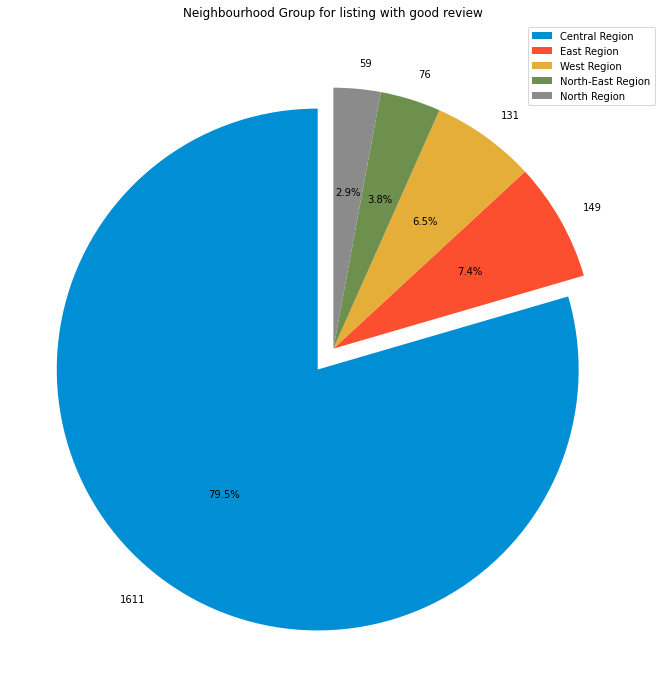

In [74]:
labels = listing_with_good_reviews['neighbourhood_group_cleansed'].value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = listing_with_good_reviews['neighbourhood_group_cleansed'].value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group for listing with good review')
plt.show()

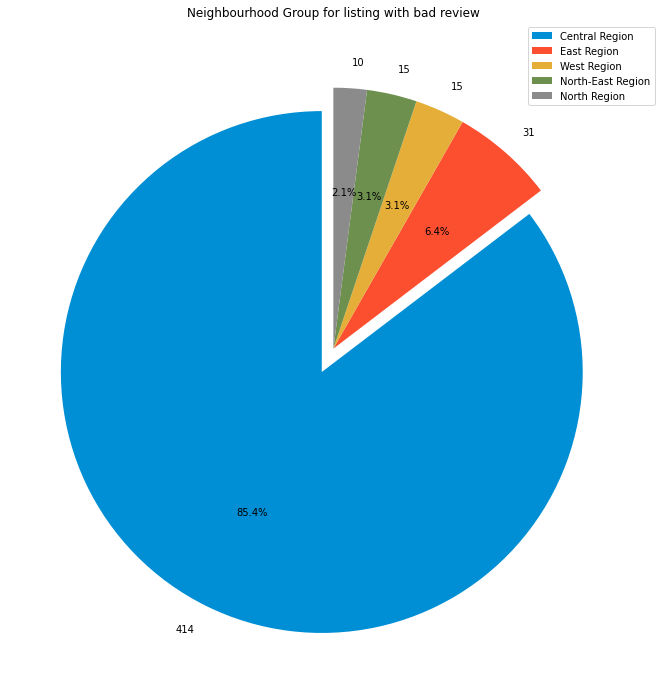

In [75]:
labels = listing_with_bad_reviews['neighbourhood_group_cleansed'].value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = listing_with_bad_reviews['neighbourhood_group_cleansed'].value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group for listing with bad review')
plt.show()

**We see that the Central Region has more listings than the other regions combined and this is unsurprising. In general, Airbnb guests are likely to be either tourists or expatriates working in Singapore; most offices and attractions are located in the Central Region, thus hosts would strategically locate their listings there**

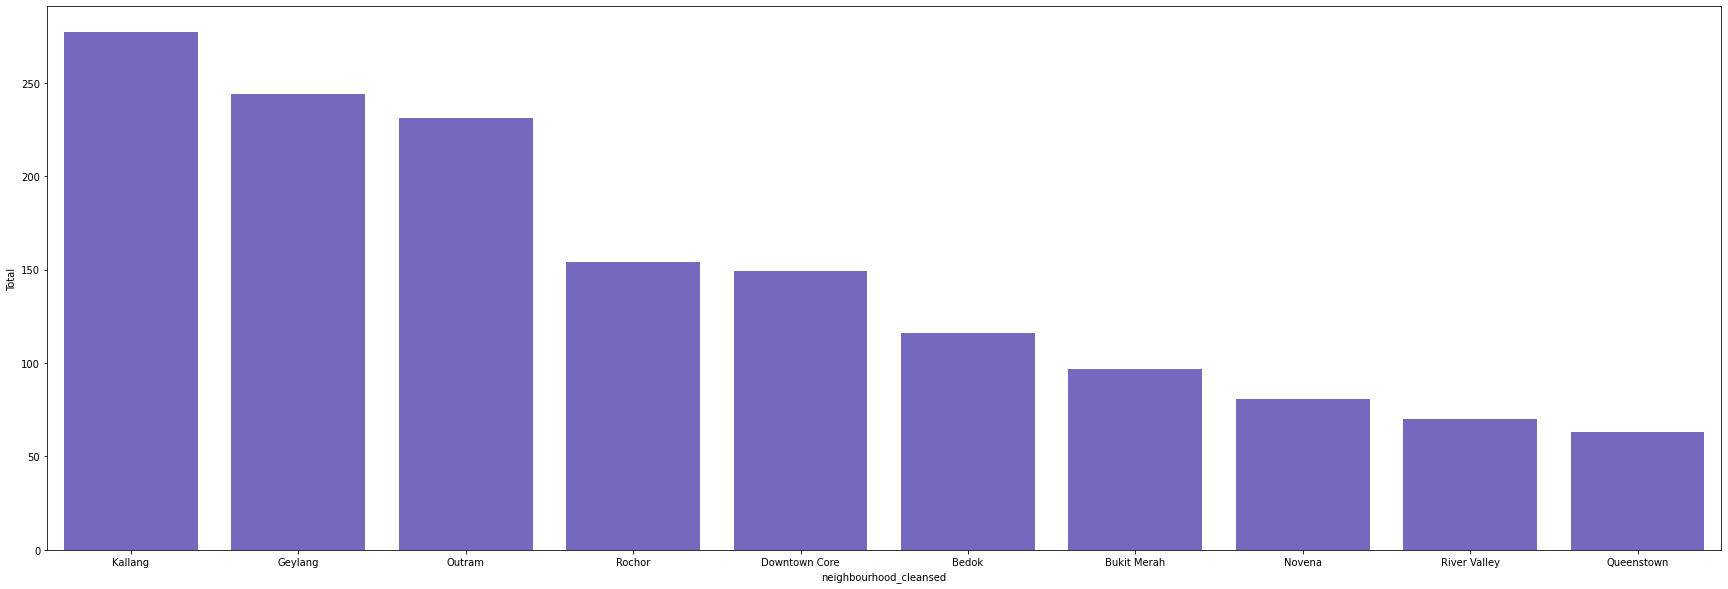

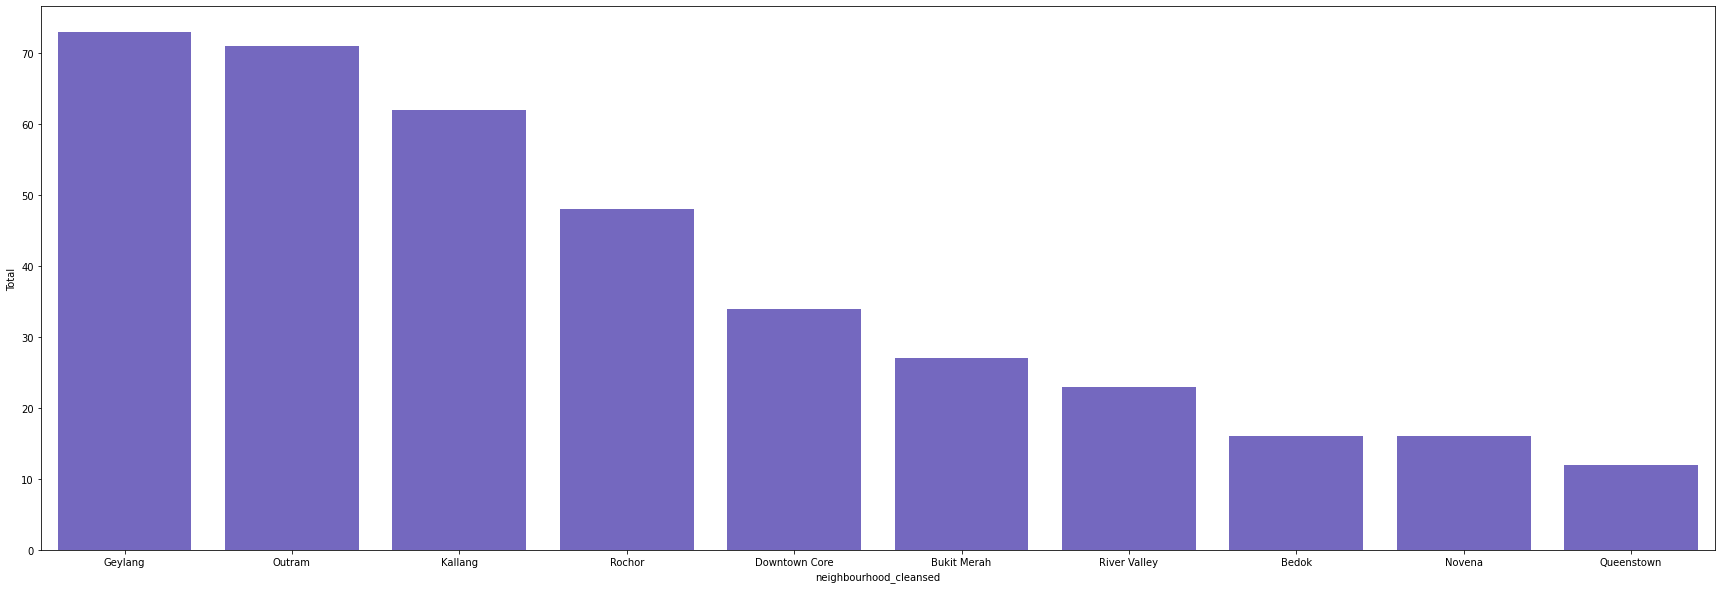

In [76]:
plt.figure(figsize=(30,10))
sns.barplot(data=neighbourhood_in_good,
            x = 'neighbourhood_cleansed',
            y = 'Total',
            color='slateblue')

plt.figure(figsize=(30,10))
sns.barplot(data=neighbourhood_in_bad,
            x = 'neighbourhood_cleansed',
            y = 'Total',
            color='slateblue')

In [77]:
amenity_list = {}

def count_word(sentence):
    for word in sentence.split(","):
        clean = re.sub("[^a-zA-Z ]", " ", word).strip().lower()

        if clean not in amenity_list:
            amenity_list[clean] = 1
        else:
            amenity_list[clean] += 1
            
listing_clean['amenities'].apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
3667    None
3668    None
3669    None
3670    None
3671    None
Name: amenities, Length: 3661, dtype: object

In [78]:
word_count = pd.Series(amenity_list).sort_values(ascending=False).head(25).reset_index()

In [79]:
word_count

,index,0
0,long term stays allowed,3578
1,air conditioning,3538
2,wifi,3519
3,essentials,3068
4,washer,3028
5,hangers,2926
6,kitchen,2853
7,iron,2730
8,dedicated workspace,2660
9,hair dryer,2534


**Visualize with barplot for top 25 most mentioned amenities words in listing with good reviews**

[Text(0, 0, 'long term stays allowed'),
 Text(0, 0, 'air conditioning'),
 Text(0, 0, 'wifi'),
 Text(0, 0, 'essentials'),
 Text(0, 0, 'washer'),
 Text(0, 0, 'hangers'),
 Text(0, 0, 'kitchen'),
 Text(0, 0, 'iron'),
 Text(0, 0, 'dedicated workspace'),
 Text(0, 0, 'hair dryer'),
 Text(0, 0, 'dryer'),
 Text(0, 0, 'hot water'),
 Text(0, 0, 'shampoo'),
 Text(0, 0, 'tv'),
 Text(0, 0, 'elevator'),
 Text(0, 0, 'refrigerator'),
 Text(0, 0, 'pool'),
 Text(0, 0, 'smoke alarm'),
 Text(0, 0, 'microwave'),
 Text(0, 0, 'fire extinguisher'),
 Text(0, 0, 'dishes and silverware'),
 Text(0, 0, 'bed linens'),
 Text(0, 0, 'gym'),
 Text(0, 0, 'cooking basics'),
 Text(0, 0, 'stove')]

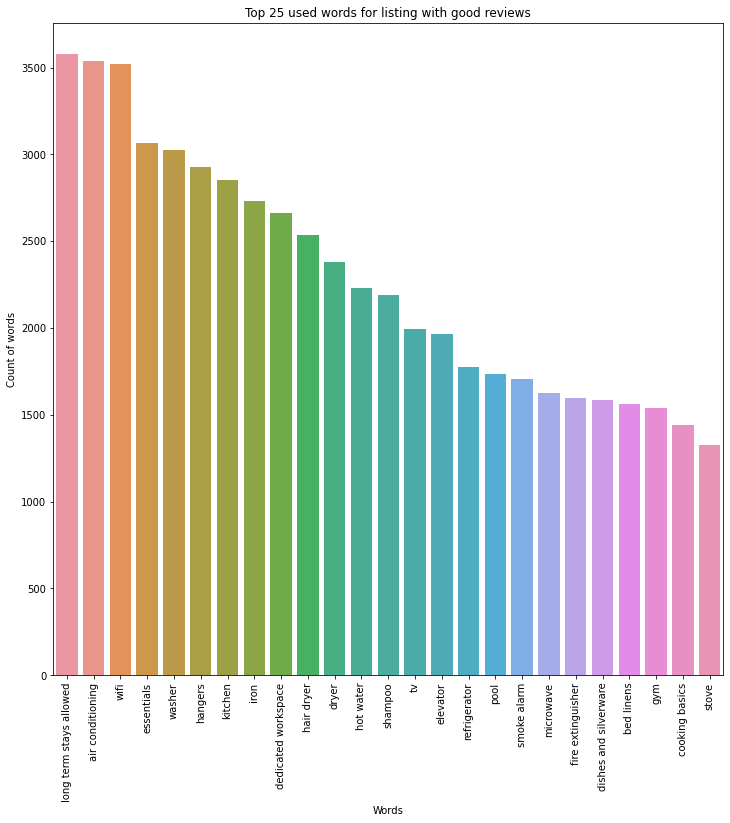

In [80]:

listing_good_review_word_count = pd.DataFrame(word_count)
listing_good_review_word_count.rename(columns={'index':'Words',0:'Counts'},inplace=True)
plt.figure(figsize=(12,12))
viz_count = sns.barplot(x='Words',y='Counts', data = listing_good_review_word_count)
viz_count.set_title('Top 25 used words for listing with good reviews')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

In [81]:
amenity_list = {}
listing_with_bad_reviews['amenities'].apply(count_word)
word_count = pd.Series(amenity_list).sort_values(ascending=False).head(25).reset_index()

In [82]:
word_count

,index,0
0,air conditioning,480
1,long term stays allowed,479
2,wifi,478
3,essentials,422
4,hair dryer,419
5,hangers,401
6,washer,388
7,iron,387
8,dedicated workspace,358
9,hot water,358


**Visualize with barplot for top 25 most mentioned amenities words in listing with bad reviews**

[Text(0, 0, 'air conditioning'),
 Text(0, 0, 'long term stays allowed'),
 Text(0, 0, 'wifi'),
 Text(0, 0, 'essentials'),
 Text(0, 0, 'hair dryer'),
 Text(0, 0, 'hangers'),
 Text(0, 0, 'washer'),
 Text(0, 0, 'iron'),
 Text(0, 0, 'dedicated workspace'),
 Text(0, 0, 'hot water'),
 Text(0, 0, 'shampoo'),
 Text(0, 0, 'kitchen'),
 Text(0, 0, 'tv'),
 Text(0, 0, 'dryer'),
 Text(0, 0, 'refrigerator'),
 Text(0, 0, 'elevator'),
 Text(0, 0, 'smoke alarm'),
 Text(0, 0, 'fire extinguisher'),
 Text(0, 0, 'dishes and silverware'),
 Text(0, 0, 'microwave'),
 Text(0, 0, 'bed linens'),
 Text(0, 0, 'lock on bedroom door'),
 Text(0, 0, 'first aid kit'),
 Text(0, 0, 'luggage dropoff allowed'),
 Text(0, 0, 'stove')]

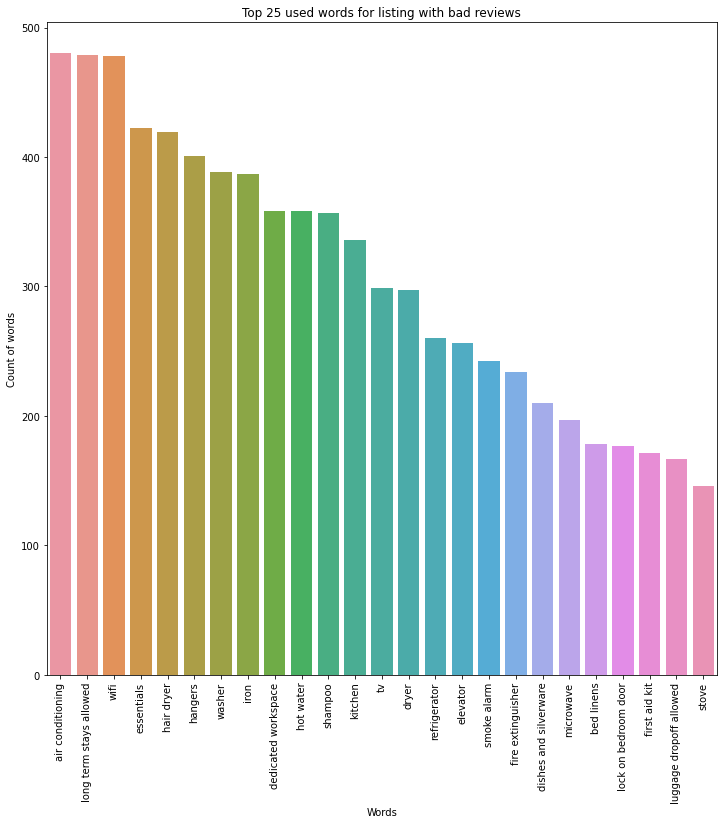

In [83]:
listing_bad_review_word_count = pd.DataFrame(word_count)
listing_bad_review_word_count.rename(columns={'index':'Words',0:'Counts'},inplace=True)
plt.figure(figsize=(12,12))

viz_count = sns.barplot(x='Words',y='Counts', data = listing_bad_review_word_count)
viz_count.set_title('Top 25 used words for listing with bad reviews')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

**Amenities in both group have quite alot in commons**

**Count how many amenities a listing casually has**

In [84]:
amenity_count_list = {}

def count_word(idx):
    sentence = listing_with_good_reviews.loc[idx,'amenities']
    listing_id = listing_with_good_reviews.loc[idx,'id']
    if(listing_id not in amenity_count_list):
        amenity_count_list[listing_id] = 0
        for word in sentence.split(","):
          amenity_count_list[listing_id] +=1
            
listing_with_good_reviews.index.to_series().apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
3607    None
3610    None
3630    None
3638    None
3644    None
Length: 2026, dtype: object

In [85]:
amenity_count_good_listing = pd.Series(amenity_count_list).reset_index()

In [86]:
amenity_count_good_listing.rename(columns={'index':'id',0:'Total Amenities'},inplace=True)

In [87]:
listing_with_good_reviews = pd.merge(listing_with_good_reviews, amenity_count_good_listing, on="id")

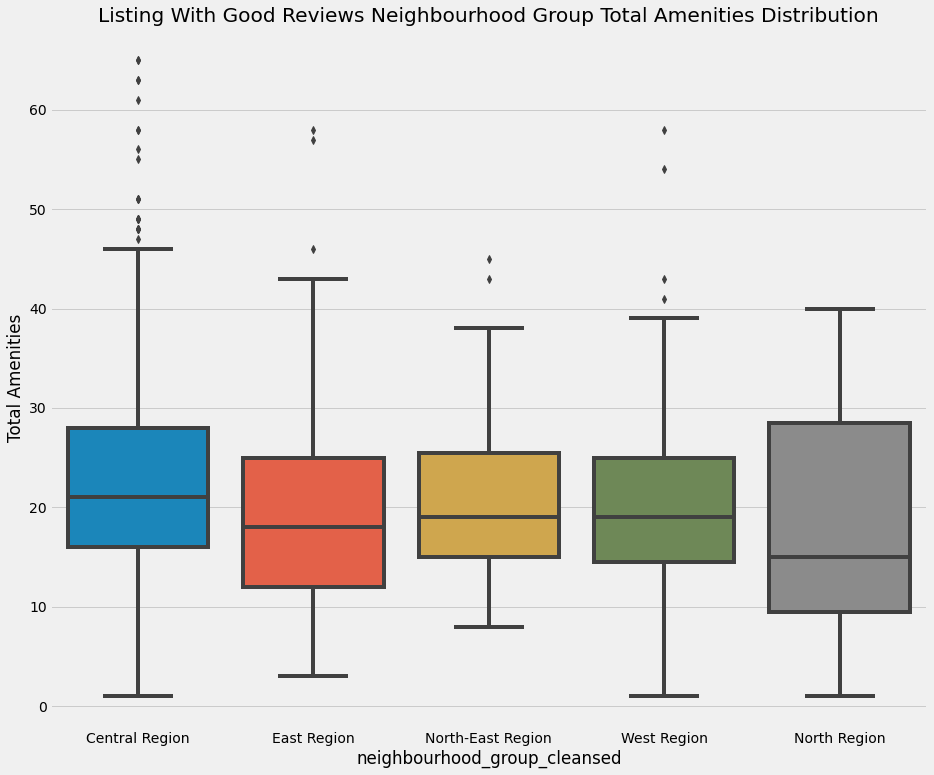

In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='Total Amenities',x='neighbourhood_group_cleansed',data = listing_with_good_reviews)
plt.title('Listing With Good Reviews Neighbourhood Group Total Amenities Distribution')
plt.show()

**A listing in each neighbourhood group with good review normally has around 22 amenities with the variance of 4**

**Reset amenity_count_list to empty object**

In [89]:
amenity_count_list = {}

In [90]:
amenity_count_list = {}

def count_word(idx):
    sentence = listing_with_bad_reviews.loc[idx,'amenities']
    listing_id = listing_with_bad_reviews.loc[idx,'id']
    if(listing_id not in amenity_count_list):
        amenity_count_list[listing_id] = 0
        for word in sentence.split(","):
          amenity_count_list[listing_id] +=1
            
listing_with_bad_reviews.index.to_series().apply(count_word)

1       None
2       None
3       None
6       None
12      None
        ... 
3158    None
3204    None
3228    None
3253    None
3437    None
Length: 485, dtype: object

In [91]:
amenity_count_bad_listing = pd.Series(amenity_count_list).reset_index()

In [92]:
amenity_count_bad_listing.rename(columns={'index':'id',0:'Total Amenities'},inplace=True)

In [93]:
listing_with_bad_reviews = pd.merge(listing_with_bad_reviews, amenity_count_bad_listing, on="id")

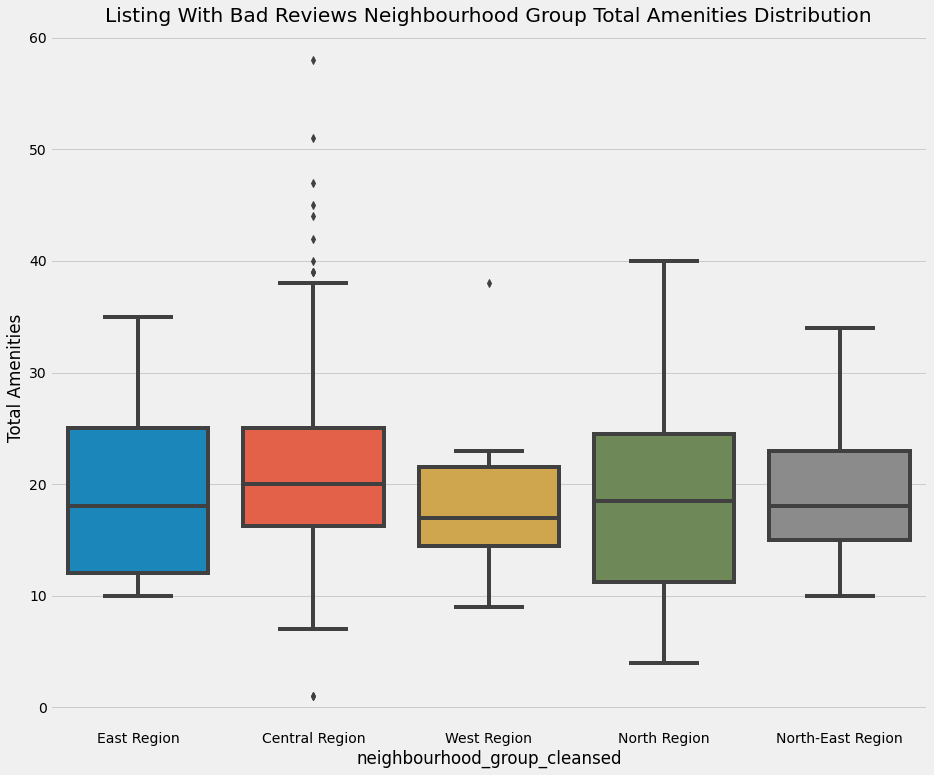

In [94]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='Total Amenities',x='neighbourhood_group_cleansed',data = listing_with_bad_reviews)
plt.title('Listing With Bad Reviews Neighbourhood Group Total Amenities Distribution')
plt.show()

****A listing in each neighbourhood group with bad review normally has around 20 amenities with the variance of 8****

**Not much difference between number of amenities in each area between 2 groups except for North Region**

**Visualize how differences in room type vary amongst each neighbourhood group in both groups (listing with good and listing with bad comments)**

In [95]:
import plotly.offline as pyo
import plotly.graph_objs as go
#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
#Group the room type using 'neighbourhood_group' as an index
airbnb_types=listing_with_good_reviews.groupby(['neighbourhood_group_cleansed', 'room_type']).size()
#Create function to plot room type proportion on all region area
    

for region in listing_with_good_reviews.neighbourhood_group_cleansed.unique():
    
    plt.figure(figsize=(12,12))
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, marker=dict(colors=colors))
    reg_ch.show()

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

**North Region in good listings dominated by private room while North Region in bad listings dominated by**

In [96]:
#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
#Group the room type using 'neighbourhood_group' as an index
airbnb_types=listing_with_bad_reviews.groupby(['neighbourhood_group_cleansed', 'room_type']).size()
#Create function to plot room type proportion on all region area
for region in listing_with_bad_reviews.neighbourhood_group_cleansed.unique():
    
    plt.figure(figsize=(10,10))
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, marker=dict(colors=colors))
    reg_ch.show()
    

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

**Both group were dominated by Private room type in 5 different neighbourhood group. It appeared that the occurence of hotel room had the least in quantity amongst the 5 room types. This could be because Singapore had only started to accept hotel listing from 2018**

In [97]:
host_response_time_good = listing_with_good_reviews.groupby('host_response_time')['id'].count()

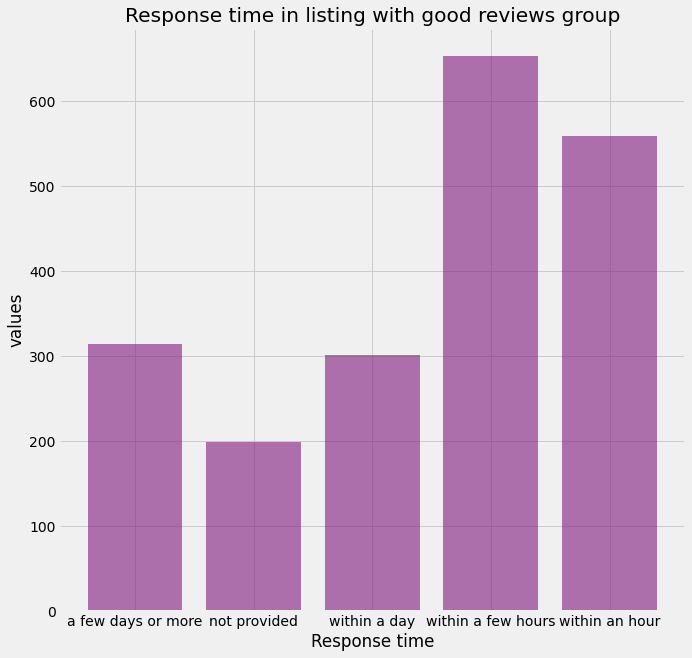

In [98]:
plt.figure(figsize=(10,10))
# Create bars and choose color
plt.bar(host_response_time_good.index, host_response_time_good.values, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Response time in listing with good reviews group')
plt.xlabel('Response time')
plt.ylabel('values')
 
# Create names on the x axis
plt.xticks(host_response_time_good.index)
 
# Show graph
plt.show()

In [99]:
host_response_time_bad = listing_with_bad_reviews.groupby('host_response_time')['id'].count()

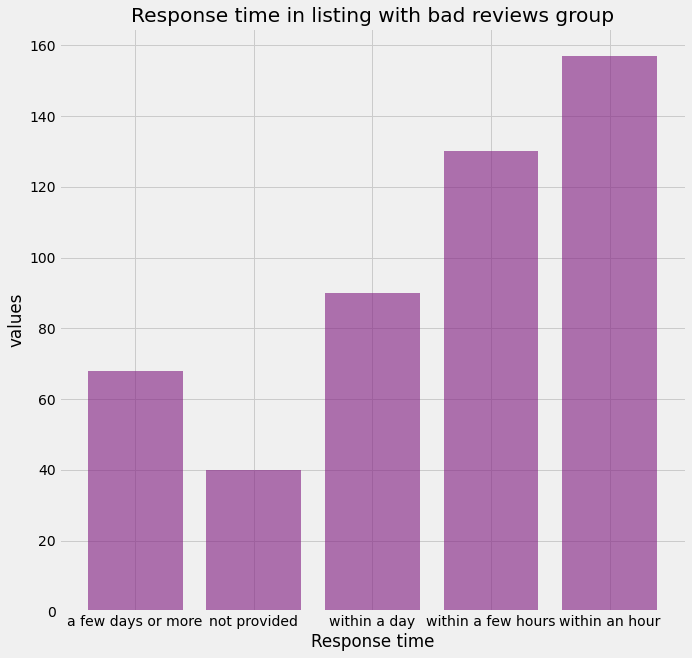

In [100]:
plt.figure(figsize=(10,10))
# Create bars and choose color
plt.bar(host_response_time_bad.index, host_response_time_bad.values, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Response time in listing with bad reviews group')
plt.xlabel('Response time')
plt.ylabel('values')
 
# Create names on the x axis
plt.xticks(host_response_time_bad.index)
 
# Show graph
plt.show()

**A bit strange on how listings with bad reviews had the tendency to reply their customers faster than listings with good reviews which took a few hours to response rather than response within an hour like listings with bad review**

# Export files

In [ ]:
!pip uninstall gspread-dataframe

Found existing installation: gspread-dataframe 3.0.8
Uninstalling gspread-dataframe-3.0.8:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gspread_dataframe-3.0.8.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gspread_dataframe.py
Proceed (y/n)? 

In [ ]:
pip install gspread-dataframe

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [ ]:
# Authorize Google Sheets API
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
# # Create a new Google Spreadsheets
##ONLY USE for first run, comment out from second run
# sh = gc.create('DS_AirBnB_Group11') #đặt tên cho bảng ở đây

**GSheet key: 1olkewo3OcbYjWrEuluOyFSgTi492sXHjCXyd75QD2MA**

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.get_worksheet(worksheet_id)
    set_with_dataframe(worksheet, data)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 0, listing_clean)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 1, review_clean)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 2, listing_with_good_reviews)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 3, listing_with_bad_reviews)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 4, neighbourhood_in_good)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 5, neighbourhood_in_bad)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 6, amenity_count_good_listing)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 7, amenity_count_bad_listing)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 8, host_response_time_good.reset_index())

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 9, host_response_time_bad.reset_index())

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 10, listing_bad_review_word_count)

In [ ]:
# export_data('1uiP70CaDVnKQo_bX2Wkp2Gb2K-v7VlBGt5pQSnsAi5k', 11, listing_good_review_word_count)